In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re
import nltk # This is crucial for the next line

nltk.download('stopwords')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
#loading the data
fake=pd.read_csv("/content/Fake.csv")
true=pd.read_csv("/content/True.csv")

In [43]:
#Creating a category for whether fake or not
#where 1 stand for fake news and 0 stands for true news

fake["category"]=1
true["category"]=0

In [44]:
#joining the data the two data frame and reseting index
df=pd.concat([fake,true]).reset_index(drop=True)

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


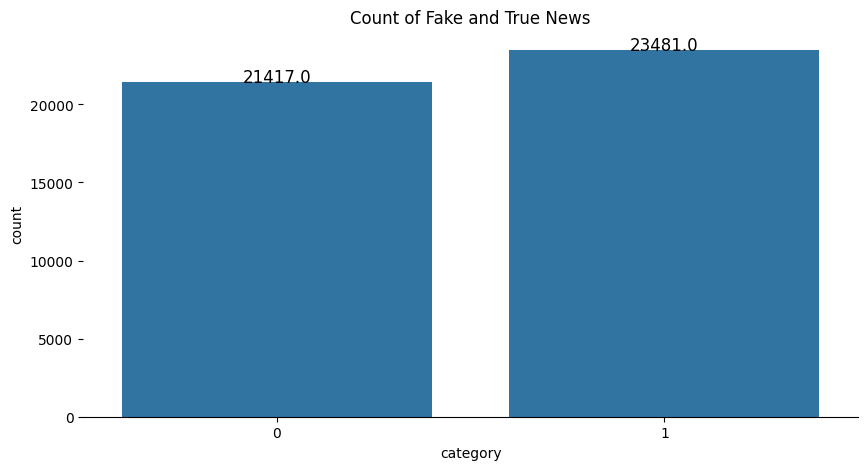

In [46]:
#creating a count plot for category column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="category", data=df)
plt.title("Count of Fake and True News")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

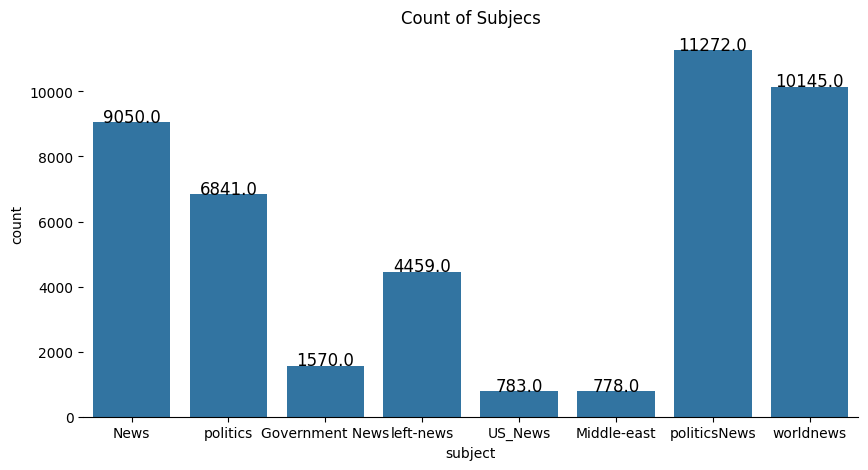

In [47]:
#creating a count plot for subject column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="subject", data=df)
plt.title("Count of Subjecs")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

# Data Cleaning

In [48]:
#checking the missing values in each columns
df.isna().sum()*100/len(df)

,0
title,0.0
text,0.0
subject,0.0
date,0.0
category,0.0


In [49]:
#checking if there is empty string in TEXT column
blanks=[]

#index,label and review of the doc
for index,text in df["text"].items(): # it will iter through index,label and review
    if text.isspace(): # if there is a space
        blanks.append(index) #it will be noted down in empty list

len(blanks)

631

In [50]:
#instead of dropping these values we are going to merge title with text

df["text"] =df["title"]+df["text"]

#we only need two columns rest can be ignored

df=df[["text","category"]]

In [51]:
#importing libraries for cleaning puprose

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re


### Stopwords
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory. home/pratima/nltk_data/corpora/stopwords is the directory address.(Do not forget to change your home directory name)

### Lemmatisation
lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a morphological analysis to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.

In [52]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [53]:
#creating list of stopwords containing stopwords from spacy and nltk

#stopwords of spacy
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
179
382


In [54]:
#text cleaning function
def clean_text(text):

    """
    It takes text as an input and clean it by applying several methods

    """

    string = ""

    #lower casing
    text=text.lower()

    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)

    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "

    return string


In [55]:

import nltk
import spacy
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download the 'wordnet' dataset
nltk.download('wordnet')

# Load spacy library
nlp = spacy.load("en_core_web_sm")

# Creating instance of WordNetLemmatizer
lemma = WordNetLemmatizer()

# Creating list of stopwords containing stopwords from spacy and nltk
list1 = nlp.Defaults.stop_words
list2 = stopwords.words('english')
Stopwords = set((set(list1) | set(list2)))

# Text cleaning function
def clean_text(text):
    """
    It takes text as an input and clean it by applying several methods
    """
    string = ""

    # Lower casing
    text = text.lower()

    # Simplifying text
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)

    # Removing any special character
    text = re.sub(r"[-()\"#!@$%^&*{}?.,:]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub('[^A-Za-z0-9]+', ' ', text)

    for word in text.split():
        if word not in Stopwords:
            string += lemma.lemmatize(word) + " "

    return string

# Cleaning the whole data
df["text"] = df["text"].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Word Cloud

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [56]:
from wordcloud import WordCloud

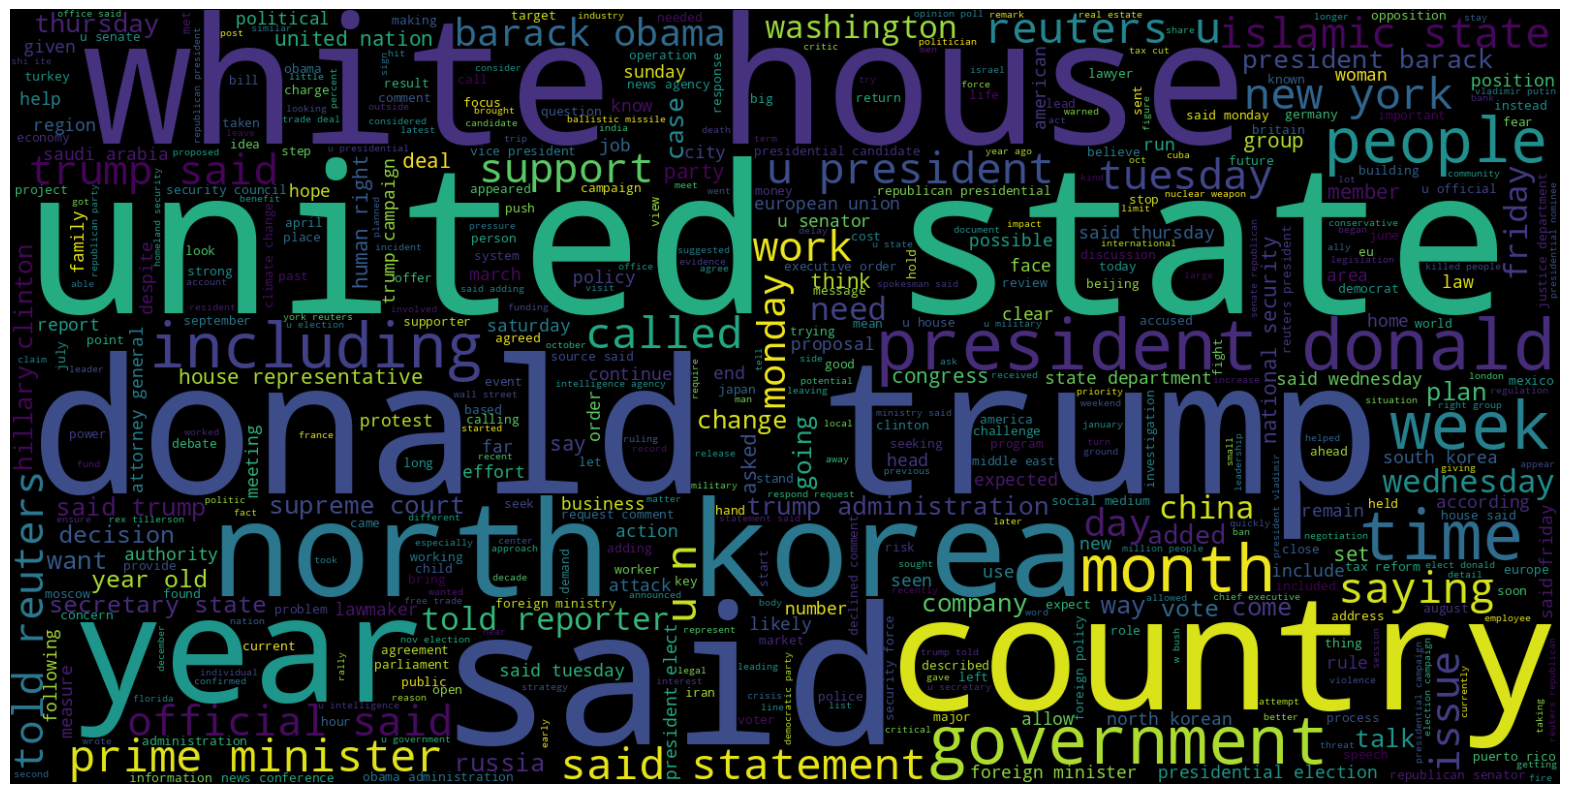

In [57]:
#True News
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [58]:
#creating more intiuive wordcloud

#pil is pillow and used for image manupulation
from PIL import Image


#  Feature-Extraction & Model building


In [62]:
#splitting the
from sklearn.model_selection import train_test_split


X=df["text"] #feature
y=df["category"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
#importing libraries to build a pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


In [64]:
#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [65]:
#making prediction using the model
predictions=text_clf.predict(X_test)

In [66]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7039
           1       0.99      0.99      0.99      7778

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



In [67]:
#overall acuracy
print(metrics.accuracy_score(y_test,predictions))

0.9935884457042586


In [68]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[6997   42]
 [  53 7725]]
